In [363]:
print("h")

h


In [364]:
import pandas as pd
import pickle
import warnings
import requests
import logging
from datetime import datetime, timedelta

warnings.filterwarnings("ignore")


In [365]:
file_path = r"D:\JMM Internship\M3 - Machine learning\Project\Assignment-1\CryptoForecasting\data\processed_data\ethusdt_1d_processed.csv"

df = pd.read_csv(file_path)
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,Taker Buy Base Volume,Taker Buy Quote Volume,Ignore,Average Price,Price Change,year,month,day
0,2022-01-01,3676.22,3776.45,3673.46,3828.27,154143.8968,1641081599999,5.747183e+08,408666,76937.9798,2.868554e+08,0,3724.955,152.05,2022,1,1
1,2022-01-02,3765.54,3857.44,3717.30,3765.89,154791.4263,1641167999999,5.853750e+08,450610,81170.5053,3.070566e+08,0,3787.370,0.35,2022,1,2
2,2022-01-03,3828.11,3853.09,3680.00,3785.11,236245.8586,1641254399999,8.929441e+08,594541,114525.6299,4.330844e+08,0,3766.545,-43.00,2022,1,3
3,2022-01-04,3765.89,3900.73,3713.11,3540.63,288258.5549,1641340799999,1.098183e+09,676651,147451.4285,5.619582e+08,0,3806.920,-225.26,2022,1,4
4,2022-01-05,3785.10,3848.00,3415.00,3406.81,397942.0363,1641427199999,1.464819e+09,962670,183641.1134,6.766633e+08,0,3631.500,-378.29,2022,1,5


In [366]:
features = ["Open",'High', 'Low', 'Quote Asset Volume',
       'Number of Trades', 'Taker Buy Quote Volume',
       'Average Price', 'Price Change', 'year', 'day', 'Close']

df = df[features]

In [367]:
df.head()

,Open,High,Low,Quote Asset Volume,Number of Trades,Taker Buy Quote Volume,Average Price,Price Change,year,day,Close
0,3676.22,3776.45,3673.46,5.747183e+08,408666,2.868554e+08,3724.955,152.05,2022,1,3828.27
1,3765.54,3857.44,3717.30,5.853750e+08,450610,3.070566e+08,3787.370,0.35,2022,2,3765.89
2,3828.11,3853.09,3680.00,8.929441e+08,594541,4.330844e+08,3766.545,-43.00,2022,3,3785.11
3,3765.89,3900.73,3713.11,1.098183e+09,676651,5.619582e+08,3806.920,-225.26,2022,4,3540.63
4,3785.10,3848.00,3415.00,1.464819e+09,962670,6.766633e+08,3631.500,-378.29,2022,5,3406.81


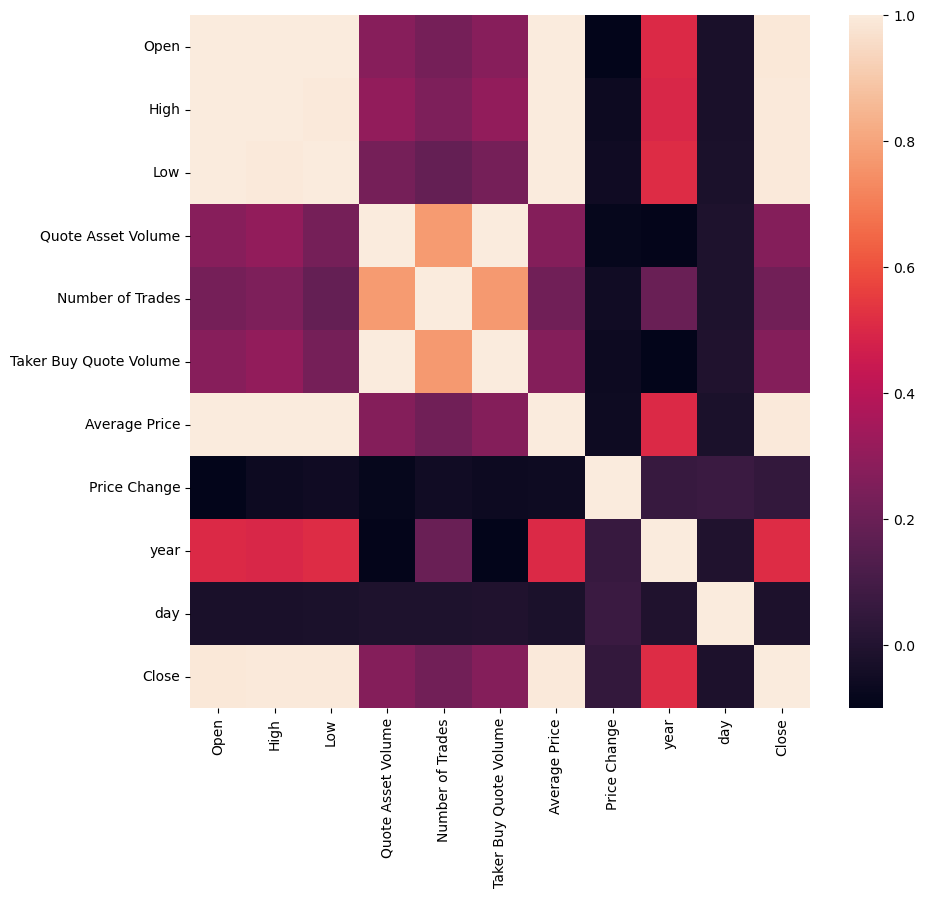

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,9))


sns.heatmap(df.corr())

plt.show()

In [369]:
X = df.drop("Close", axis=1)

y = df['Close']

In [370]:

split_index = int(0.9 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



In [371]:
# X_train = X_train.select_dtypes(exclude=['datetime64'])
# X_test = X_test.select_dtypes(exclude=['datetime64'])


In [372]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()

# Scaling the input features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [373]:
from sklearn.linear_model import LinearRegression   

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [374]:
y_pred = model.predict(X_test_scaled)

In [375]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 4.694249976238432e-25
Mean Absolute Error: 5.866240826435387e-13
